# Predict the number of carpooling around you AND THE DESTINATION

## Preparing the data

In [1]:
#2022 on Ile-de-France region

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [58]:
df_2022=pd.read_csv("/Users/clemence/IRONHACK/Final_project/Main data set clean/df2022_clean.csv")

In [4]:
df_2022.head()

,Unnamed: 0,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,...,journey_end_lon,journey_end_lat,journey_end_insee,journey_end_department,journey_end_towngroup,journey_distance,journey_duration,has_incentive,nb_passengers,year
0,401044,7668840,fecae00f-6bfe-46a2-b59d-5571b1723740,2022-07-01T00:00:00+02:00,2022-07-01,00:00:00,2.784,48.866,77111,77.0,...,2.817,48.850,77018,77.0,CA Val d'Europe Agglomération,4993,11,OUI,4,2022
1,401045,7689879,f358cd4d-010e-4952-89be-b9b882b7c580,2022-07-01T00:00:00+02:00,2022-07-01,00:00:00,2.562,48.530,77040,77.0,...,2.612,48.565,77495,77.0,CA Grand Paris Sud Seine Essonne Sénart,8876,16,OUI,2,2022
2,401046,7689880,290e9d12-329f-4cc7-b78b-16d86eec506a,2022-07-01T00:00:00+02:00,2022-07-01,00:00:00,1.964,48.773,78208,78.0,...,2.450,48.843,75056,75.0,Métropole du Grand Paris,43666,63,OUI,3,2022
3,401047,7689873,290e9d12-329f-4cc7-b78b-16d86eec506a,2022-07-01T00:00:00+02:00,2022-07-01,00:00:00,1.964,48.773,78208,78.0,...,2.450,48.843,75056,75.0,Métropole du Grand Paris,43666,63,OUI,3,2022
4,401048,7689877,428275c2-237a-4344-9f93-97eeced40c49,2022-07-01T00:00:00+02:00,2022-07-01,00:00:00,2.325,48.805,92007,92.0,...,2.107,48.703,91272,91.0,CA Communauté Paris-Saclay,23144,41,OUI,2,2022


In [59]:
df_2022_IDF=df_2022[df_2022["journey_start_department"].isin(["75","75.0","77","77.0","78","78.0","92","92.0","93","93.0","94","94.0","95","95.0"])]

In [60]:
df_2022_IDF.shape

(107651, 24)

In [61]:
#it seems to be a good number of rows for modeling

In [62]:
df_2022_IDF.columns

Index(['Unnamed: 0', 'journey_id', 'trip_id', 'journey_start_datetime',
       'journey_start_date', 'journey_start_time', 'journey_start_lon',
       'journey_start_lat', 'journey_start_insee', 'journey_start_department',
       'journey_start_towngroup', 'journey_end_datetime', 'journey_end_date',
       'journey_end_time', 'journey_end_lon', 'journey_end_lat',
       'journey_end_insee', 'journey_end_department', 'journey_end_towngroup',
       'journey_distance', 'journey_duration', 'has_incentive',
       'nb_passengers', 'year'],
      dtype='object')

In [63]:
df_2022_IDF.drop(["Unnamed: 0","journey_distance","journey_duration","has_incentive","nb_passengers","year"],axis=1,inplace=True)

In [64]:
df_2022_IDF.shape

(107651, 18)

In [65]:
df_2022_IDF.columns

Index(['journey_id', 'trip_id', 'journey_start_datetime', 'journey_start_date',
       'journey_start_time', 'journey_start_lon', 'journey_start_lat',
       'journey_start_insee', 'journey_start_department',
       'journey_start_towngroup', 'journey_end_datetime', 'journey_end_date',
       'journey_end_time', 'journey_end_lon', 'journey_end_lat',
       'journey_end_insee', 'journey_end_department', 'journey_end_towngroup'],
      dtype='object')

In [66]:
#Now I am keeping the journey_end_towngroup to get the destination

In [67]:
df_2022_IDF.drop(["trip_id","journey_start_datetime","journey_start_date","journey_start_insee","journey_start_department","journey_start_towngroup","journey_end_datetime","journey_end_date","journey_end_time","journey_end_insee","journey_end_department"],axis=1,inplace=True)

In [68]:
df_2022_IDF.head()

,journey_id,journey_start_time,journey_start_lon,journey_start_lat,journey_end_lon,journey_end_lat,journey_end_towngroup
32768,7745334,14:30:00,2.403,48.771,2.206,48.688,CA Communauté Paris-Saclay
32769,7745475,14:30:00,2.565,48.945,2.525,48.975,Métropole du Grand Paris
32770,7721587,14:30:00,2.456,48.816,2.479,48.806,Métropole du Grand Paris
32772,7721613,14:30:00,2.437,48.944,2.477,48.905,Métropole du Grand Paris
32773,7721564,14:30:00,2.771,48.857,2.797,48.871,CA Val d'Europe Agglomération


In [69]:
df_2022_IDF.drop(["journey_end_lon","journey_end_lat"],axis=1,inplace=True)

In [70]:
df_2022_IDF.set_index("journey_id",inplace=True)

In [71]:
df_2022_IDF.head()

,journey_start_time,journey_start_lon,journey_start_lat,journey_end_towngroup
journey_id,,,,
7745334,14:30:00,2.403,48.771,CA Communauté Paris-Saclay
7745475,14:30:00,2.565,48.945,Métropole du Grand Paris
7721587,14:30:00,2.456,48.816,Métropole du Grand Paris
7721613,14:30:00,2.437,48.944,Métropole du Grand Paris
7721564,14:30:00,2.771,48.857,CA Val d'Europe Agglomération


In [72]:
df_2022_IDF.to_csv("/Users/clemence/IRONHACK/Final_project_carpool/Final_project_carpooling/data_2nd_model.csv")

In [73]:
df_2022_IDF.describe()

,journey_start_lon,journey_start_lat
count,107651.000000,107651.000000
mean,2.359058,48.845382
std,0.253471,0.122624
min,1.450000,48.125000
25%,2.218000,48.787000
50%,2.361000,48.845000
75%,2.532000,48.927000
max,3.478000,49.204000


In [74]:
#I keep the max and min in a dict for later
importantValuesMax = df_2022_IDF.max().to_dict()
importantValuesMin = df_2022_IDF.min().to_dict()

In [75]:
df_2022_IDF["journey_start_time"] = pd.to_datetime(df_2022_IDF["journey_start_time"])

In [76]:
from matplotlib import pyplot as plt

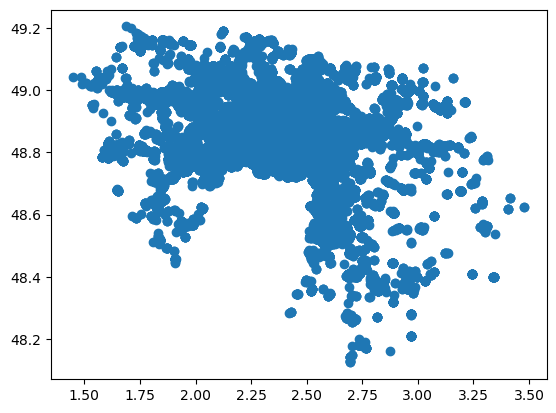

In [77]:
plt.scatter(df_2022_IDF['journey_start_lon'],df_2022_IDF['journey_start_lat'])

## Clustering

In [78]:
clusters_df = df_2022_IDF[['journey_start_lat', 'journey_start_lon']]

In [79]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [80]:
Y_axis = clusters_df[['journey_start_lat']]
X_axis = clusters_df[['journey_start_lon']]

In [81]:
import numpy as np
#Building and fitting the model
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(6,100) 
X = clusters_df.sample(n=10000)
  
for k in K:  
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

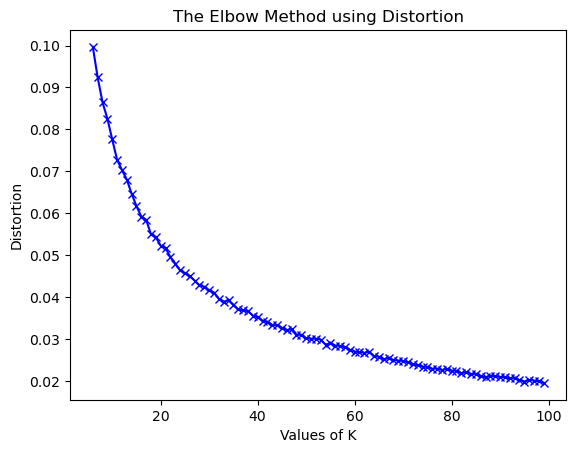

In [82]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [32]:
#We can choose 35 k

In [83]:
X = clusters_df
kmeans = KMeans(n_clusters=35)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [84]:
import seaborn as sns

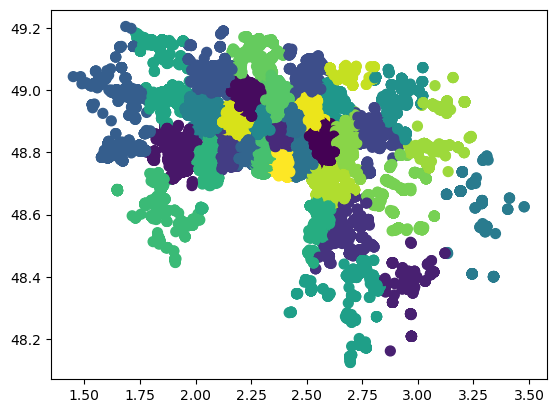

In [85]:
plt.scatter(X['journey_start_lon'],X['journey_start_lat'], c=y_kmeans, s=50, cmap='viridis')


In [86]:
#now we save the model
import pickle

In [87]:
pickle.dump(kmeans, open('kmeansIDF_2.pickle', 'wb'))

In [88]:
df_2022_IDF['cluster'] = y_kmeans

In [89]:
df_2022_IDF

,journey_start_time,journey_start_lon,journey_start_lat,journey_end_towngroup,cluster
journey_id,,,,,
7745334,2023-03-15 14:30:00,2.403,48.771,CA Communauté Paris-Saclay,34
7745475,2023-03-15 14:30:00,2.565,48.945,Métropole du Grand Paris,33
7721587,2023-03-15 14:30:00,2.456,48.816,Métropole du Grand Paris,13
7721613,2023-03-15 14:30:00,2.437,48.944,Métropole du Grand Paris,12
7721564,2023-03-15 14:30:00,2.771,48.857,CA Val d'Europe Agglomération,7
...,...,...,...,...,...
9119737,2023-03-15 22:40:00,2.239,48.839,Métropole du Grand Paris,11
9182509,2023-03-15 22:40:00,2.454,48.819,CA Val d'Europe Agglomération,13
9095599,2023-03-15 22:40:00,2.233,48.979,Métropole du Grand Paris,1


In [47]:
#df_2022_IDF["journey_start_time"] = df_2022_IDF["journey_start_time"].dt.time
#df_2022_IDF.rename(columns={'journey_start_time':'time'}, inplace=True)

In [53]:
groupbyA

In [91]:
df_2022_IDF['journey_start_time'] = pd.to_datetime(df_2022_IDF['journey_start_time'])
groupbyB = df_2022_IDF.groupby(['cluster', pd.Grouper(key='journey_start_time', freq='H')])['journey_end_towngroup'].agg(lambda x:x.value_counts().index[0]).reset_index()

In [92]:
groupbyB

,cluster,journey_start_time,journey_end_towngroup
0,0,2023-03-15 00:00:00,Métropole du Grand Paris
1,0,2023-03-15 01:00:00,Métropole du Grand Paris
2,0,2023-03-15 02:00:00,Métropole du Grand Paris
3,0,2023-03-15 03:00:00,Métropole du Grand Paris
4,0,2023-03-15 04:00:00,CC Les Portes Briardes entre Villes et Forêts
...,...,...,...
818,34,2023-03-15 19:00:00,Métropole du Grand Paris
819,34,2023-03-15 20:00:00,Métropole du Grand Paris
820,34,2023-03-15 21:00:00,Métropole du Grand Paris
821,34,2023-03-15 22:00:00,Métropole du Grand Paris


In [93]:
groupbyB[groupbyB["cluster"]==0].value_counts("journey_end_towngroup")

journey_end_towngroup
Métropole du Grand Paris                         23
CC Les Portes Briardes entre Villes et Forêts     1
dtype: int64

In [105]:
list=list(groupbyB["cluster"].unique())

In [108]:
for x in list: 
    print(groupbyB[groupbyB["cluster"]==x].value_counts("journey_end_towngroup"))

journey_end_towngroup
Métropole du Grand Paris                         23
CC Les Portes Briardes entre Villes et Forêts     1
dtype: int64
journey_end_towngroup
Métropole du Grand Paris    23
CA Val Parisis               1
dtype: int64
journey_end_towngroup
CA de Saint-Quentin-en-Yvelines          16
Métropole du Grand Paris                  6
CA Versailles Grand Parc (C.A.V.G.P.)     2
dtype: int64
journey_end_towngroup
CC Pays de Montereau                       7
CA Melun Val de Seine                      3
CC Moret Seine et Loing                    3
CA Grand Paris Sud Seine Essonne Sénart    2
CA du Pays de Fontainebleau                2
CA Communauté Paris-Saclay                 1
CA Paris - Vallée de la Marne              1
CC Pays de Nemours                         1
Métropole du Grand Paris                   1
dtype: int64
journey_end_towngroup
Métropole du Grand Paris    24
dtype: int64
journey_end_towngroup
CA Grand Paris Sud Seine Essonne Sénart    11
CA Melun Val de Seine  

In [109]:
#18 clusters sur 35 ont MGP comme main destination. That makes sense in view of the flows between Paris and the suburbs

## Construction of the model

## Decision Tree

In [111]:
groupbyB.head()

,cluster,journey_start_time,journey_end_towngroup
0,0,2023-03-15 00:00:00,Métropole du Grand Paris
1,0,2023-03-15 01:00:00,Métropole du Grand Paris
2,0,2023-03-15 02:00:00,Métropole du Grand Paris
3,0,2023-03-15 03:00:00,Métropole du Grand Paris
4,0,2023-03-15 04:00:00,CC Les Portes Briardes entre Villes et Forêts


In [112]:
def secondTime(t):
    seconds = (t.hour * 60 + t.minute) * 60 + t.second
    return seconds

In [113]:
groupbyB['journey_start_time'] = groupbyB['journey_start_time'].map(lambda x:secondTime(x))

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(groupbyB[['cluster', 'journey_start_time']], groupbyB['journey_end_towngroup'], test_size=0.2, random_state=42)


In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6424242424242425


In [122]:
pickle.dump(clf, open('DTModel.pickle', 'wb'))

In [121]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train)


y_pred = clf2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5333333333333333


In [125]:
pickle.dump(clf2, open('KnnClassModel.pickle', 'wb'))